# Simple Linear Regression #

### Treasury Bonds Holdins vs US Dollar Index ###

In [22]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Statistics
import statsmodels.api as sm 
import matplotlib.pyplot as plt

# Get Data
from fredapi import Fred

In [23]:
# Data Collection Function from FRED
def get_fred_data(symbol: str) -> pd.DataFrame:
    
    fred_key = '0174cb93931388a2bf305663e4117fd3'

    fred = Fred(api_key = fred_key)
    
    df = fred.get_series(symbol)
    
    return df

In [24]:
# Data for Y (Memorandum Items: Custody Holdings: Marketable U.S. Treasury Securities: Wednesday Level)
y = get_fred_data('WMTSECL1')

# Creating Time Index
y.index = pd.to_datetime(y.index)

print(y)

2002-12-18          0.0
2002-12-25          0.0
2003-01-01          0.0
2003-01-08          0.0
2003-01-15          0.0
                ...    
2025-04-23    2943493.0
2025-04-30    2916875.0
2025-05-07    2919091.0
2025-05-14    2909440.0
2025-05-21    2905298.0
Length: 1171, dtype: float64


In [25]:
# Data for Explanatory Variables (Nominal Broad U.S. Dollar Index)
x = get_fred_data('DTWEXBGS')

# Time Index
x.index = pd.to_datetime(x.index)

print(x)

2006-01-02    101.4155
2006-01-03    100.7558
2006-01-04    100.2288
2006-01-05    100.2992
2006-01-06    100.0241
                ...   
2025-05-12    123.7948
2025-05-13    123.2905
2025-05-14    123.0145
2025-05-15    123.1492
2025-05-16    123.3969
Length: 5055, dtype: float64


In [26]:
# Create the Data for Lineal Regression
ols_df = pd.DataFrame({'x': x, 'y': y})

# Eliminate 0s
ols_df = ols_df[(ols_df['x'] > 0) & (ols_df['y'] > 0)]

# Cut the Sample
ols_df = ols_df["2018-01-01":]

ols_df

,x,y
2018-01-03,109.6751,3014079.0
2018-01-10,109.6277,3017693.0
2018-01-17,108.1526,3017984.0
2018-01-24,107.0801,3013396.0
2018-01-31,106.7695,3032653.0
...,...,...
2025-04-16,123.6167,2939491.0
2025-04-23,123.3750,2943493.0
2025-04-30,122.9440,2916875.0
2025-05-07,122.4652,2919091.0


In [27]:
# We use Natural Log to calculate better betas
log_ols_df = np.log(ols_df)

# Drop NaNs
log_ols_df = log_ols_df.dropna()

# Set Index as a Date Item
log_ols_df.index = pd.to_datetime(log_ols_df.index)

log_ols_df

,x,y
2018-01-03,4.697522,14.918805
2018-01-10,4.697090,14.920003
2018-01-17,4.683543,14.920100
2018-01-24,4.673577,14.918578
2018-01-31,4.670672,14.924948
...,...,...
2025-04-16,4.817186,14.893747
2025-04-23,4.815228,14.895108
2025-04-30,4.811729,14.886023
2025-05-07,4.807827,14.886783


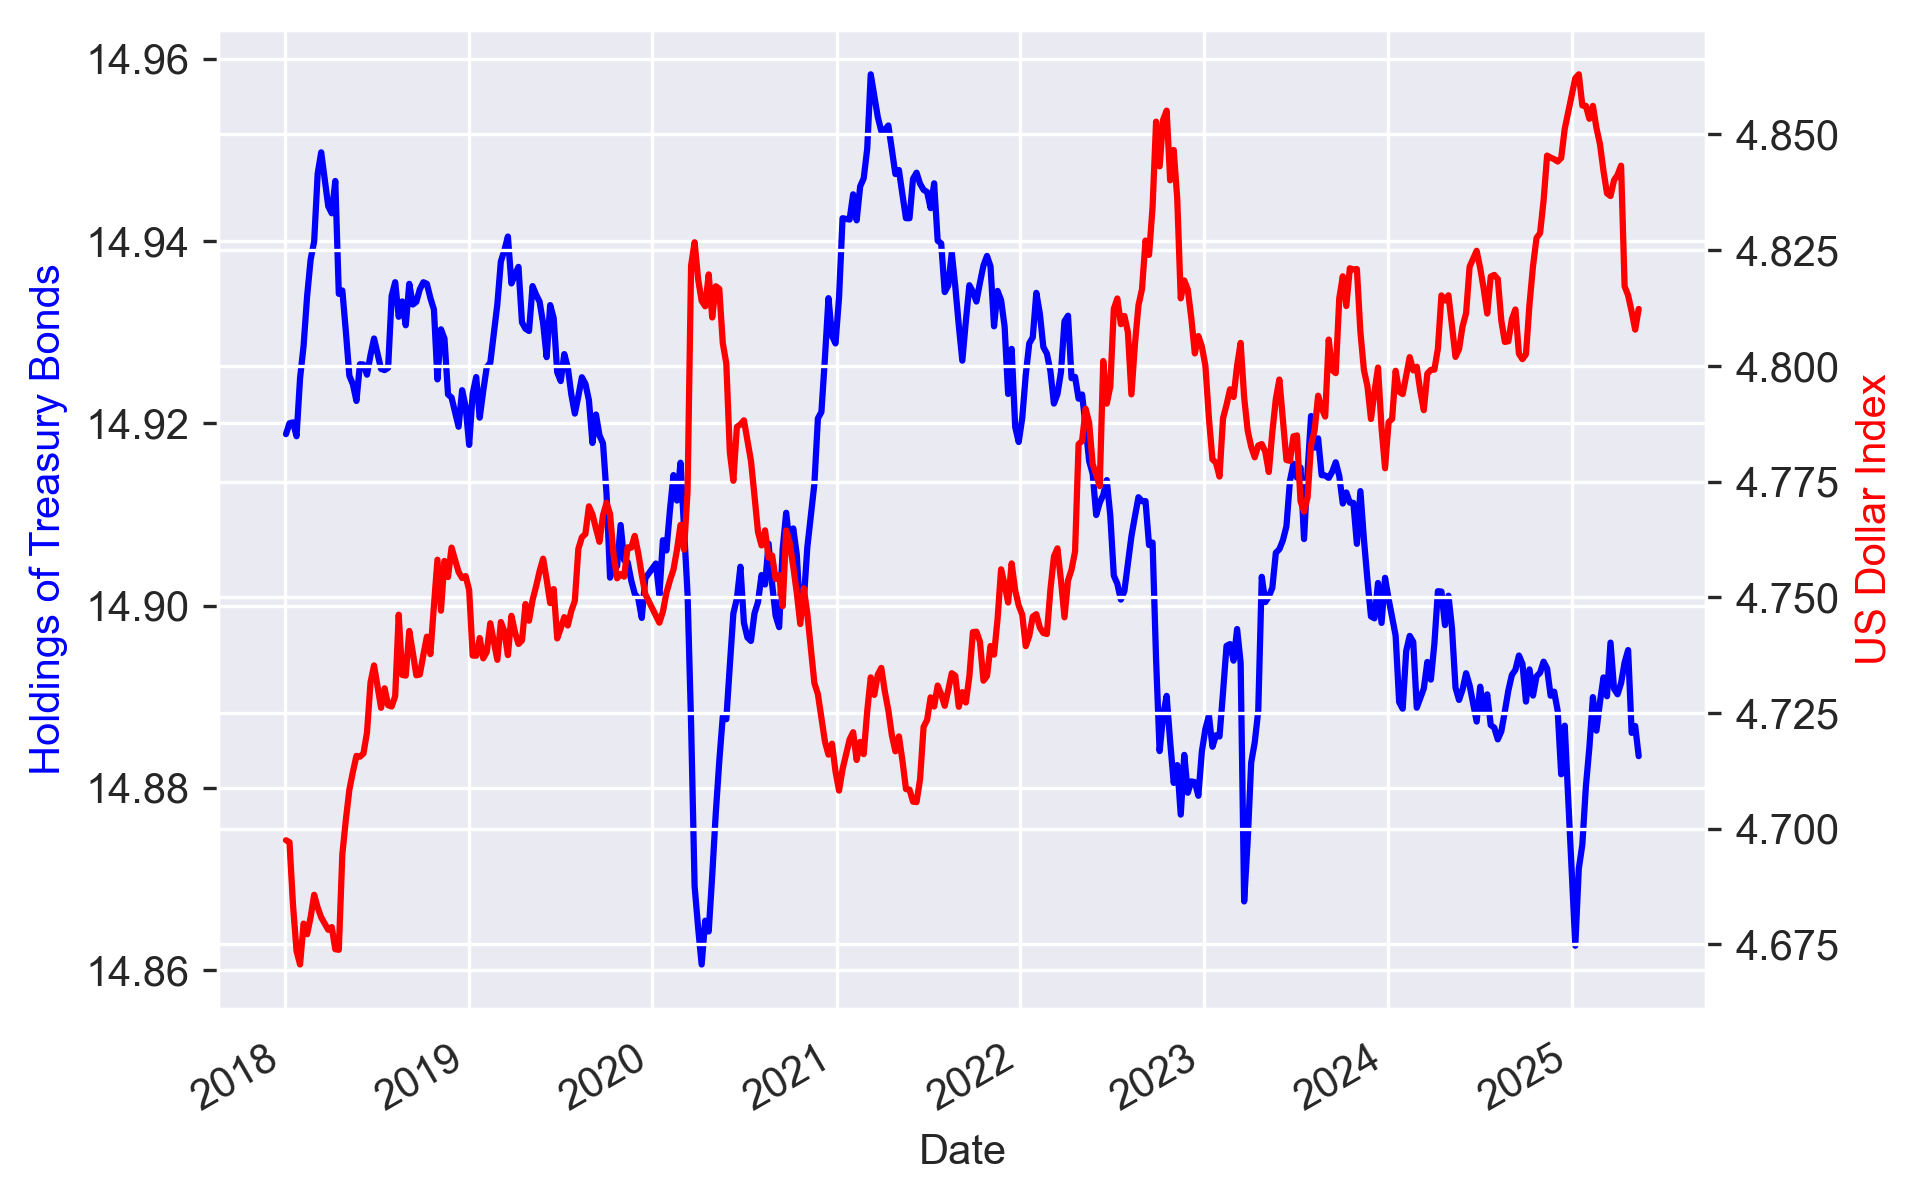

In [28]:
"""
By Plotting the Variables we might understand the relations among them
"""

# Create Figure
fig, ax1 = plt.subplots(dpi = 300)

# Holdings of Treasury Bonds Plot
log_ols_df['y'].plot(color = 'blue', ax = ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel(
    'Holdings of Treasury Bonds', 
    color='blue'
    )

# US Dollar Index Plot
ax2 = ax1.twinx()

log_ols_df['x'].plot(color = 'red', ax = ax2)
ax2.set_ylabel(
    'US Dollar Index', 
    color='red'
    )

plt.show()

Correlation Coefficient:

1) $ \rho=\frac{Cov(x,y)}{\sigma_x\sigma_y} $

In [29]:
# Calculate correlation 
correlation = log_ols_df['y'].corr(log_ols_df['x'])

print(f"\nPearson Correlation Coefficient: {correlation}")


Pearson Correlation Coefficient: -0.8169607569916291


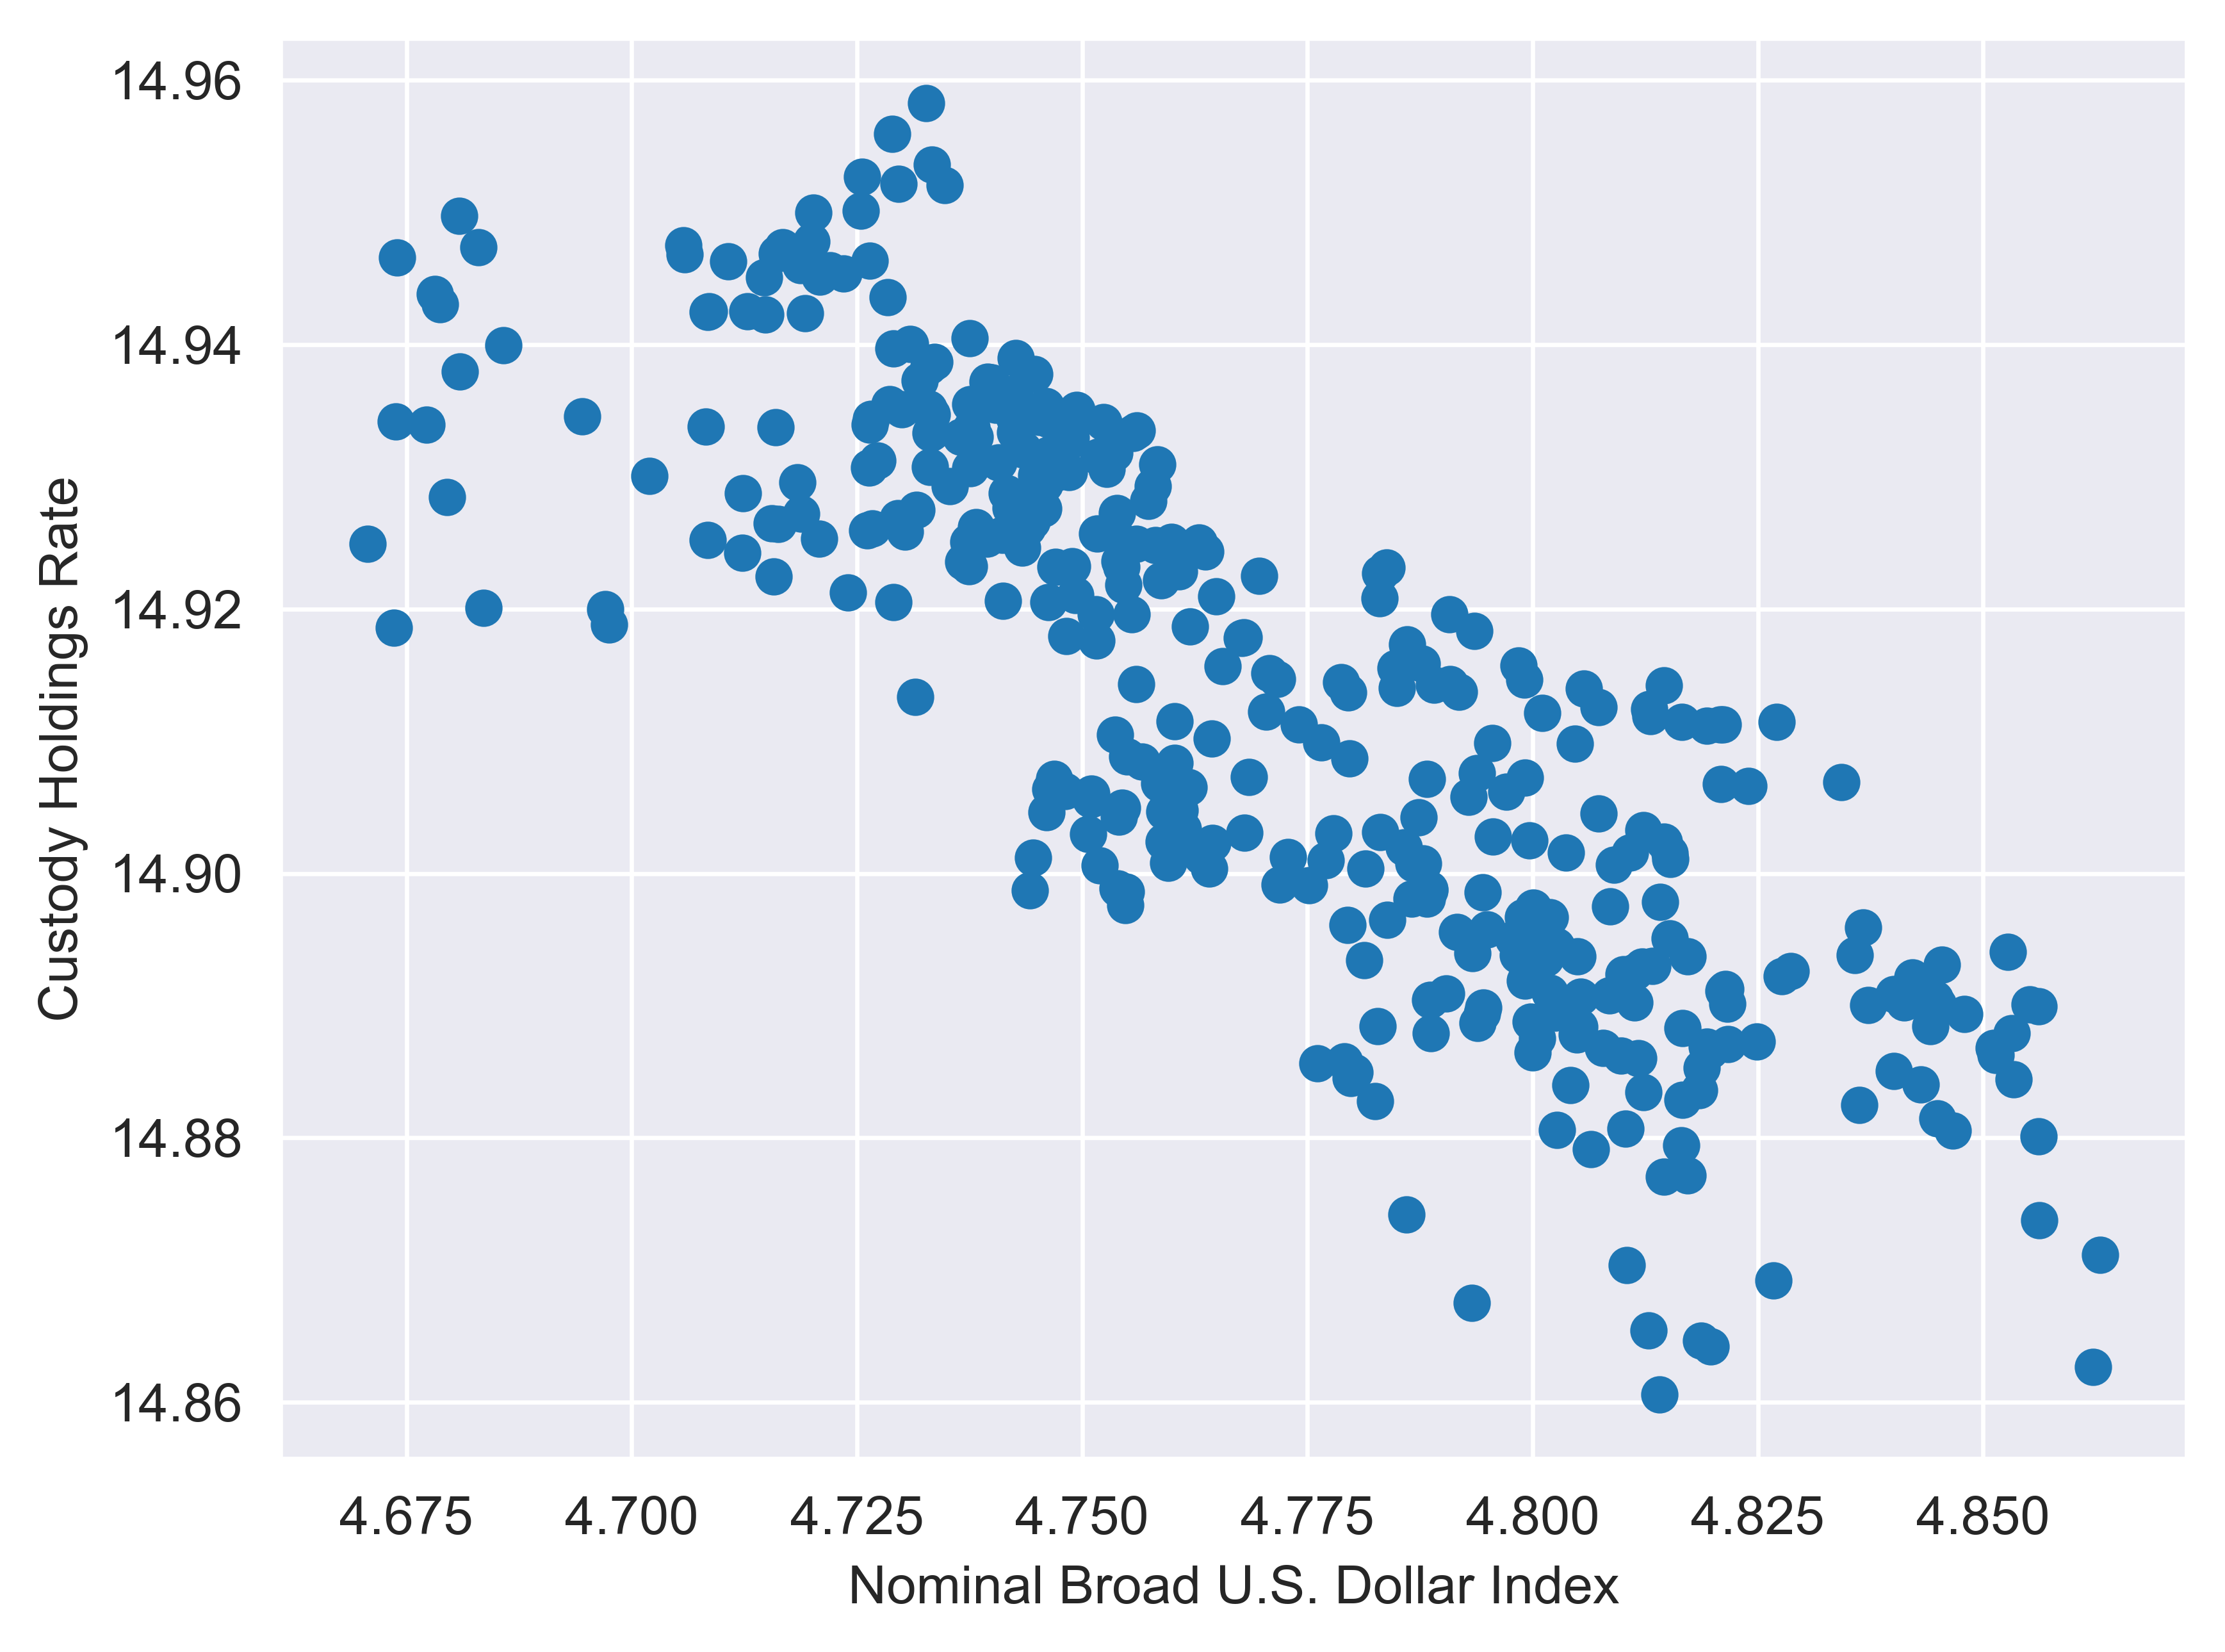

In [30]:
fig, ax1 = plt.subplots(dpi = 600)

plt.scatter(log_ols_df['x'], log_ols_df['y'])
plt.ylabel('Custody Holdings Rate')
plt.xlabel('Nominal Broad U.S. Dollar Index')

plt.show()

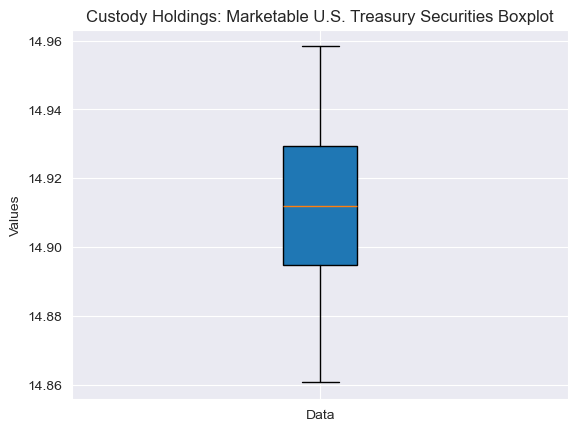

In [31]:
# Create a Box Plot to identify Outliers

plt.boxplot(log_ols_df['y'], vert=True, patch_artist=True)  

# Config
plt.title("Custody Holdings: Marketable U.S. Treasury Securities Boxplot")
plt.ylabel("Values")
plt.xticks([1], ["Data"]) 

plt.show()

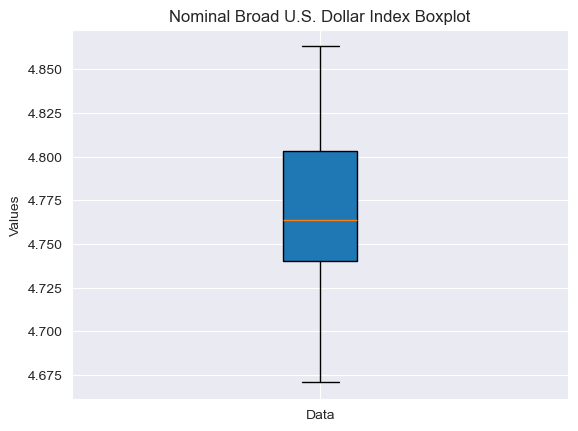

In [32]:
# Create a Box Plot to identify Outliers

plt.boxplot(log_ols_df['x'], vert=True, patch_artist=True)  

# Config
plt.title("Nominal Broad U.S. Dollar Index Boxplot")
plt.ylabel("Values")
plt.xticks([1], ["Data"]) 

plt.show()

In [33]:
# Let us eliminate those values on the Unemployment Rate Growth Rate that exceeds 3 Standard Deviations

inferior_limit = log_ols_df['y'].mean() - 3 * log_ols_df['y'].std()
superior_limit = log_ols_df['y'].mean() + 3 * log_ols_df['y'].std()

# Filter outliers
ols_df_filtered = log_ols_df[(log_ols_df["y"] >= inferior_limit) & (log_ols_df["y"] <= superior_limit)]

ols_df_filtered

,x,y
2018-01-03,4.697522,14.918805
2018-01-10,4.697090,14.920003
2018-01-17,4.683543,14.920100
2018-01-24,4.673577,14.918578
2018-01-31,4.670672,14.924948
...,...,...
2025-04-16,4.817186,14.893747
2025-04-23,4.815228,14.895108
2025-04-30,4.811729,14.886023
2025-05-07,4.807827,14.886783


In [34]:
"""
In a Linear Regression Model it is fundamental to have a Constant Value
This can be expressed as a Vertical Vector of 1's'
"""

ols_df_filtered = sm.add_constant(ols_df_filtered)

ols_df_filtered

,const,x,y
2018-01-03,1.0,4.697522,14.918805
2018-01-10,1.0,4.697090,14.920003
2018-01-17,1.0,4.683543,14.920100
2018-01-24,1.0,4.673577,14.918578
2018-01-31,1.0,4.670672,14.924948
...,...,...,...
2025-04-16,1.0,4.817186,14.893747
2025-04-23,1.0,4.815228,14.895108
2025-04-30,1.0,4.811729,14.886023
2025-05-07,1.0,4.807827,14.886783


The simple Linear Regression Model is expressed in the next form:

1) $ y=\beta_0+\beta_1x+\varepsilon $

This is the population version of the LRM. The Sample version implies estimated coefficient:

2) $ \hat{y}=\hat{\beta}_0+\hat{\beta}_1x+\varepsilon $

After solving an optimization problem, we can calculate the betas using the next expressions:

3) $ \hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x} $
4) $ \hat{\beta_1}=\frac{\sum{xy}-\bar{x}\bar{y}}{\sum{x^2}-\bar{x}^2}=\frac{Cov(x,y)}{Var(x)} $

In [35]:
# Obtaining Variance and Covariance

covariance = ols_df_filtered['y'].cov(ols_df_filtered['x'])
variance = ols_df_filtered['x'].var()

print(f"Covariance: {covariance}")
print(f"Variance: {variance}")

Covariance: -0.0007160645026765924
Variance: 0.0017746978213791364


In [36]:
# Obtaining Slope Coefficient
slope = covariance/variance

print(f"The beta coefficient is: {slope}")

The beta coefficient is: -0.4034853111613847


In [37]:
# Obtaining Intercept Coefficient

intercept = ols_df_filtered['y'].mean() - slope*ols_df_filtered['x'].mean()

print(f"The alpha coefficient is: {intercept}")

The alpha coefficient is: 16.836911519931423


In [38]:
# Obtaining Fitted Values and Residuals

ols_df_filtered['y_hat'] = intercept + slope*ols_df_filtered['x']
ols_df_filtered['residuals'] = ols_df_filtered['y'] - ols_df_filtered['y_hat']

ols_df_filtered

,const,x,y,y_hat,residuals
2018-01-03,1.0,4.697522,14.918805,14.941530,-0.022725
2018-01-10,1.0,4.697090,14.920003,14.941705,-0.021701
2018-01-17,1.0,4.683543,14.920100,14.947171,-0.027071
2018-01-24,1.0,4.673577,14.918578,14.951192,-0.032614
2018-01-31,1.0,4.670672,14.924948,14.952364,-0.027415
...,...,...,...,...,...
2025-04-16,1.0,4.817186,14.893747,14.893248,0.000499
2025-04-23,1.0,4.815228,14.895108,14.894038,0.001070
2025-04-30,1.0,4.811729,14.886023,14.895450,-0.009426
2025-05-07,1.0,4.807827,14.886783,14.897024,-0.010241


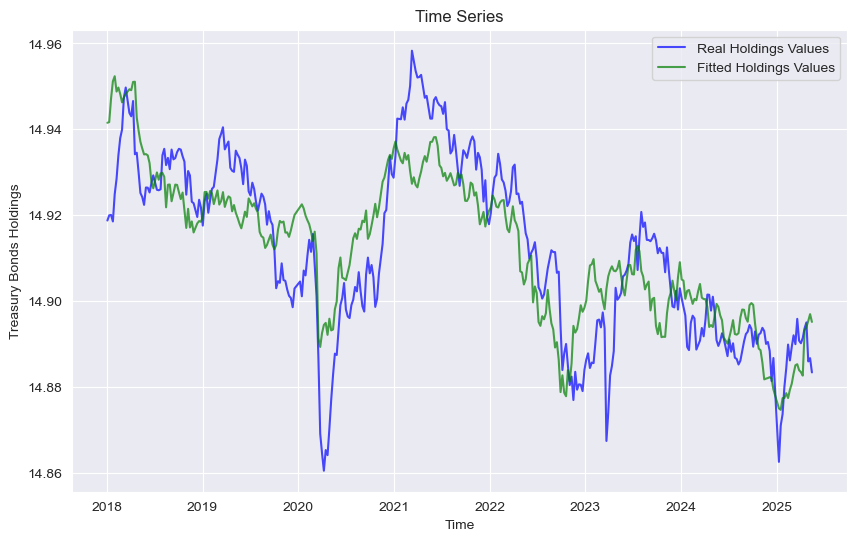

In [39]:
# Create Comparative Plot
plt.figure(figsize=(10, 6))
plt.plot(ols_df_filtered['y'], label='Real Holdings Values', color='blue', alpha=0.7)
plt.plot(ols_df_filtered['y_hat'], label='Fitted Holdings Values', color='green', alpha=0.7)

# Config
plt.title('Time Series')
plt.xlabel('Time')
plt.ylabel('Treasury Bonds Holdings')
plt.legend()

# Show
plt.show()

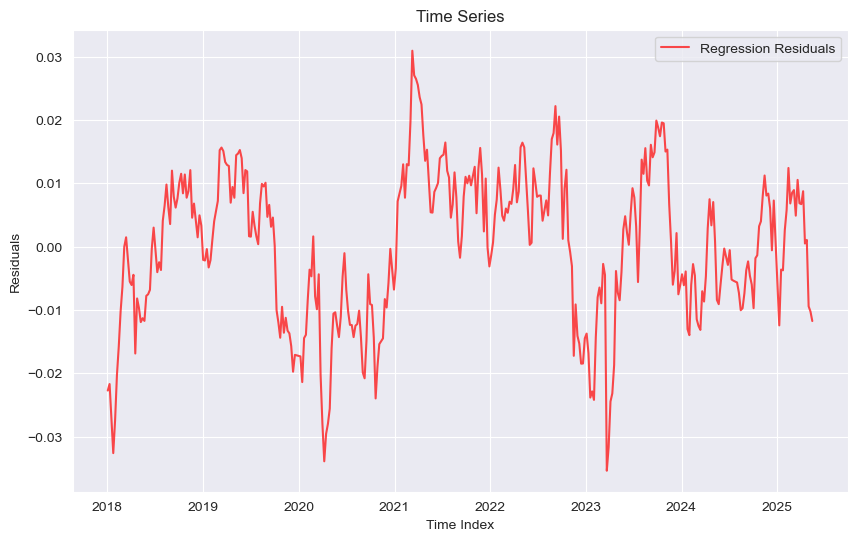

In [40]:
# Plot Residuals
plt.figure(figsize=(10, 6))
plt.plot(ols_df_filtered['residuals'], label='Regression Residuals', color='red', alpha=0.7)

# Config
plt.title('Time Series')
plt.xlabel('Time Index')
plt.ylabel('Residuals')
plt.legend()

# Show
plt.show()

In [41]:
# The Residuals Mean can give us information about the bias of the coefficients
print(f"Residuals Mean: {ols_df_filtered['residuals'].mean().round(3)}")

Residuals Mean: 0.0


The R-Squared Coefficient measures how well our model fits reality:

1) $ R^2=\frac{Var(\hat{y})}{Var(y)} $

In [43]:
# Obtain R-Squared
print(f"Fitted Values Variance: {ols_df_filtered['y_hat'].var()}")
print(f"Real Values Variance: {ols_df_filtered['y'].var()}")

Fitted Values Variance: 0.0002889215086740868
Real Values Variance: 0.0004328899296335209


In [44]:
# Then the R-Squared Coefficient
r2 = ols_df_filtered['y_hat'].var()/ols_df_filtered['y'].var()

print(f"The R-Squared Coefficient is: {r2}")

The R-Squared Coefficient is: 0.6674248784643341


To evaluate the Model, we need to calculate the Variances of the Beta Coefficients:

1) $ Var(\hat{\beta_0})=\sigma^2(\frac{1}{n}+\frac{\bar{x}^2}{(n-1)Var(x)}) $
2) $ Var(\hat{\beta_1})=\frac{\sigma^2}{nVar(x)} $

In [46]:
# Let us calculate the Slope Standard Deviation
residuals_var = ols_df_filtered['residuals'].var(ddof=1)
x_var = ols_df_filtered['x'].var()
n = len(ols_df_filtered)

print(f"Residuals Variance: {residuals_var}")
print(f"Independent Variable Variance: {x_var}")

Residuals Variance: 0.00014396842095943434
Independent Variable Variance: 0.0017746978213791364


In [47]:
slope_std = np.sqrt(residuals_var)/np.sqrt(n*x_var)

print(f"Slope Coefficient Standard Deviation: {slope_std}")

Slope Coefficient Standard Deviation: 0.014727723141104392


In [48]:
intercept_var = residuals_var * (1/n + ols_df_filtered['x'].mean()**2 / ((n - 1) * x_var))
intercept_std = np.sqrt(intercept_var)

print(f"Intercept Coefficient Standard Deviation: {intercept_std}")

Intercept Coefficient Standard Deviation: 0.0703508933586611


The t-Student Stat is commonly used to test coefficient's statistical significance: 

1) $ t = \frac{\beta}{sse(\beta)} $

In [50]:
# Calculate the t values
slope_t = slope/slope_std
intercept_t = intercept/intercept_std

if abs(slope_t) > 2:
    print(f"The t-value of {slope_t} shows evidence of statistical significance for the slope coefficient")
else:
    print(f"The t-value of {slope_t} shows no evidence of statistical significance for the slope coefficient")

if abs(intercept_t) > 2:
    print(f"The t-value of {intercept_t} shows evidence of statistical significance for the intercept coefficient")
else:
    print(f"The t-value of {intercept_t} shows no evidence of statistical significance for the intercept coefficient")

The t-value of -27.396312878483975 shows evidence of statistical significance for the slope coefficient
The t-value of 239.3276149898185 shows evidence of statistical significance for the intercept coefficient


In [51]:
#Model specification
model = sm.OLS(
    ols_df_filtered['y'], 
    sm.add_constant(ols_df_filtered['x'])
    )   
     
#the results of the model
results = model.fit() 
    
#The Parameters
Beta2 = results.params  

#here we check the summary
print(results.summary())       


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     746.5
Date:                Tue, 27 May 2025   Prob (F-statistic):           5.96e-91
Time:                        10:58:23   Log-Likelihood:                 1124.0
No. Observations:                 374   AIC:                            -2244.
Df Residuals:                     372   BIC:                            -2236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8369      0.070    239.007      0.0